In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df_main = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/With_Topic_Loadings.csv')
df_main.shape

(97139, 16)

In [52]:
from datetime import datetime,date

def getdate(d):
  if type(d) == str:
    dt = d.split('-')
    return datetime(int(dt[0]), int(dt[1]),int(dt[2])).date()
  else:
    return d

df_main['date'] = df_main['date'].map(getdate)
df_main.head(5)

,Unnamed: 0,date,body,google_mention,apple_mention,samsung_mention,garmin_mention,after_news,cleaned_text,cleaned_string,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,sentiment_compounded
0,0,2019-10-27,You could try FitBit which is really nice for ...,False,True,True,False,0,"['try', 'fitbit', 'nice', 'sleep', 'track', 'f...",try fitbit nice sleep track fitness orient sma...,0.593730,0.593731,0.167738,0.225635,0.167742,0.000000,0.7044
1,1,2019-10-27,I can't help you with your streaming questions...,False,False,False,False,0,"['help', 'stream', 'question', 'track', 'medic...",help stream question track medical reason fitb...,0.000000,0.539829,0.051187,0.262217,0.000000,0.139348,0.6087
2,2,2019-10-27,"Honestly, I'm worried how he looks may actuall...",False,False,False,False,0,"['honestly', 'worry', 'look', 'actually', 'med...",honestly worry look actually medical issue eat...,0.000000,0.951215,0.000000,0.030699,0.000000,0.000000,0.2023
3,3,2019-10-27,That's the strange thing. From what I can tell...,False,False,False,False,0,"['strange', 'thing', 'tell', 'probably', 'weig...",strange thing tell probably weigh describe ski...,0.000000,0.888474,0.073087,0.026793,0.000000,0.000000,0.5888
4,4,2019-10-27,Kind of now that I looked it up. I just said F...,False,False,False,False,0,"['kind', 'look', 'say', 'fitbit', 'early', 'th...",kind look say fitbit early think,0.027778,0.860558,0.027779,0.028070,0.027779,0.028036,0.0000


### **Sentiment Analysis**

In [5]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 9.7MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [32]:
x = sentiment_analyzer_scores(df_main['body'][0])

You could try FitBit which is really nice for sleep tracking, is more fitness oriented than smart watch oriented, and has much much better battery life but some privacy concerns. You also wouldn't be able to text/call etc. on iPhone.

FossilQ looks better than any other smartwatch but since it doesn't have a screen it only really tells you your notifications (through the hands + numbers) but that's really it.

The Samsung watches are compatible with iPhone but you lose loads of functionality and at that point it doesn't make sense not to just get an Apple Watch. {'neg': 0.034, 'neu': 0.858, 'pos': 0.109, 'compound': 0.7044}


In [0]:
x = analyser.polarity_scores(df_main['body'][0]) 


In [35]:
x

{'compound': 0.7044, 'neg': 0.034, 'neu': 0.858, 'pos': 0.109}

In [39]:
## Getting the compounded sentiment score

def getsentimentscore(s):
  try:
    score = analyser.polarity_scores(s)
    return score['compound']   
  except:
    return 0

df_main['sentiment_compounded'] = df_main['body'].map(getsentimentscore)
df_main.shape

(97139, 17)

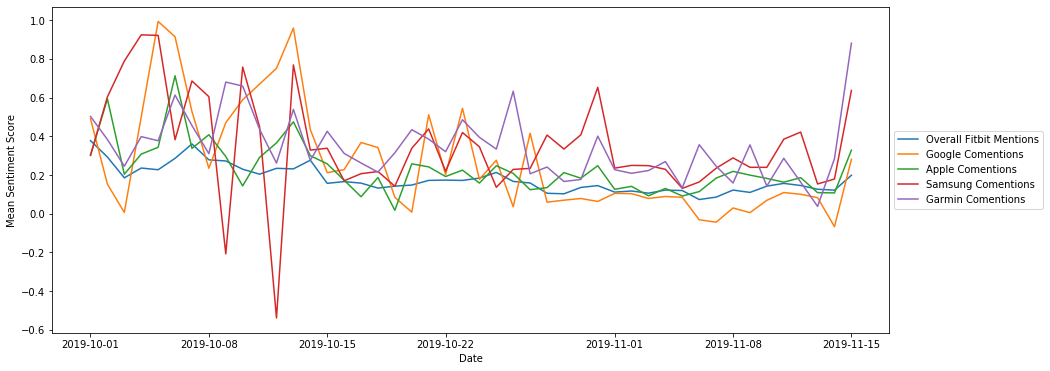

In [119]:
plt.figure(figsize=(15,6))
plt.plot(df_main.groupby('date')['sentiment_compounded'].agg('mean'), label = 'Overall Fitbit Mentions')
plt.plot(df_main[df_main['google_mention'] == True].groupby('date')['sentiment_compounded'].agg('mean'),label = 'Google Comentions' )
plt.plot(df_main[df_main['apple_mention'] == True].groupby('date')['sentiment_compounded'].agg('mean'),label = 'Apple Comentions' )
plt.plot(df_main[df_main['samsung_mention'] == True].groupby('date')['sentiment_compounded'].agg('mean'),label = 'Samsung Comentions' )
plt.plot(df_main[df_main['garmin_mention'] == True].groupby('date')['sentiment_compounded'].agg('mean'),label = 'Garmin Comentions' )
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))
plt.show()


In [121]:
df_main.groupby('after_news')['sentiment_compounded'].agg('mean')

after_news
0    0.173476
1    0.113461
2    0.117225
Name: sentiment_compounded, dtype: float64

<BarContainer object of 3 artists>

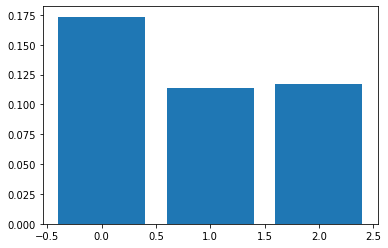

In [81]:
plt.bar(df_main.groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main.groupby('after_news')['sentiment_compounded'].agg('mean').values)

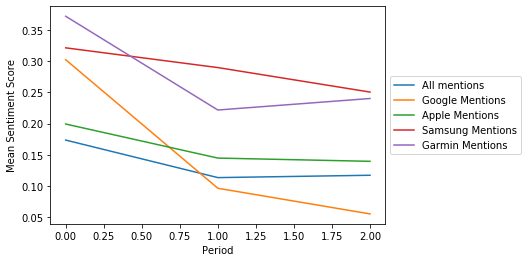

In [122]:
plt.plot(df_main.groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main.groupby('after_news')['sentiment_compounded'].agg('mean').values, label = 'All mentions')
plt.plot(df_main[df_main['google_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main[df_main['google_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').values, label = 'Google Mentions')
plt.plot(df_main[df_main['apple_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main[df_main['apple_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').values, label = 'Apple Mentions')
plt.plot(df_main[df_main['samsung_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main[df_main['samsung_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').values, label = 'Samsung Mentions')
plt.plot(df_main[df_main['garmin_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').index.values,df_main[df_main['garmin_mention'] == True].groupby('after_news')['sentiment_compounded'].agg('mean').values, label = 'Garmin Mentions')

plt.xlabel('Period')
plt.ylabel('Mean Sentiment Score')

plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.5))


In [66]:
df_companies = df_main.groupby(['after_news','google_mention','apple_mention','samsung_mention','garmin_mention'])['sentiment_compounded'].agg('mean').reset_index()

df_companies.head(5)

,after_news,google_mention,apple_mention,samsung_mention,garmin_mention,sentiment_compounded
0,0,False,False,False,False,0.166206
1,0,False,False,False,True,0.382419
2,0,False,False,True,False,0.274666
3,0,False,False,True,True,0.535963
4,0,False,True,False,False,0.175350


Before the News: (After_news flag - 0)

1.   Topic0  - Discussion about different models
2.   Topic1 - Generic wear and tear stuff
3.   Topic2 - Fitbit Benefits
4.   Topic3 - App & Watch options 
5.   Topic4 - Discussion about competition
6.   Topic5 - Discussion about health benefits and partnerships

During the Peak: (After_news flag - 1)

1.   Topic0  - Fitbit Benefits
2.   Topic1 - About Google Acquisition - other Languages
3.   Topic2 - Talking about benefits of acquisition and comparing with apple (?)
4.   Topic3 - Google Acquisition.


After the Peak: (After_news flag - 2)

1.   Topic0  - About google acquisition - Other Languages-  lol
2.   Topic1 - App & Watch options
3.   Topic2 - Fitbit Benefits
4.   Topic3 - Google Acquisition. We see that word 'Privacy' come in here



In [0]:
df_before = df_main[df_main['after_news'] == 0 ]
df_during = df_main[df_main['after_news'] == 1 ]
df_after = df_main[df_main['after_news'] == 2 ]